In [1]:
import pandas as pd

In [2]:
dataFrame = pd.read_csv('dataR2.csv')
dataFrame.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [3]:
dataFrame.Classification.unique()

array([1, 2])

In [4]:
dataFrame.dtypes

Age                 int64
BMI               float64
Glucose             int64
Insulin           float64
HOMA              float64
Leptin            float64
Adiponectin       float64
Resistin          float64
MCP.1             float64
Classification      int64
dtype: object

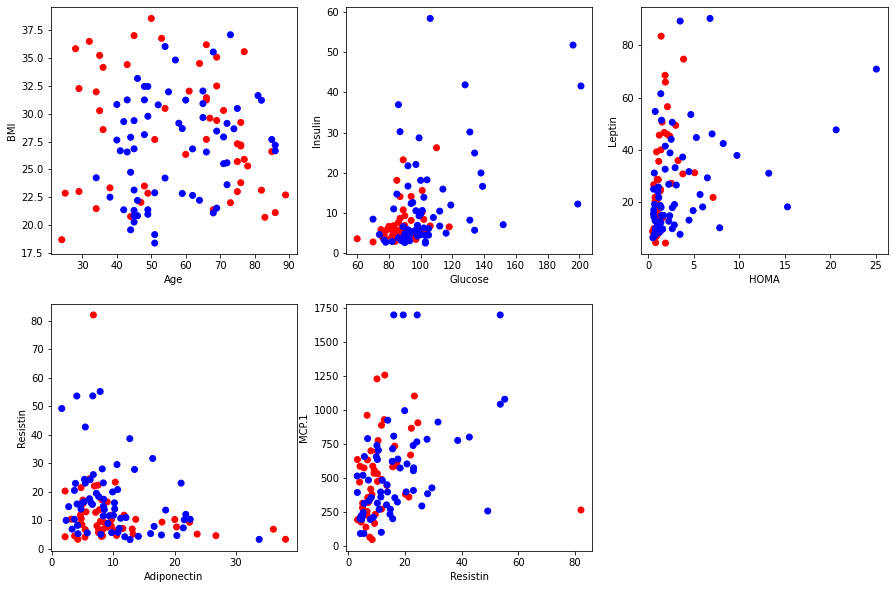

In [5]:
import matplotlib
import matplotlib.pyplot as plt

# [axis 0, axis 1]
colums = [['Age', 'BMI'],
          ['Glucose', 'Insulin'],
          ['HOMA', 'Leptin'],
          ['Adiponectin', 'Resistin'],
          ['Resistin', 'MCP.1']]

n_row = 2
n_col = 3


class_colors = ['red', 'blue']

fig, axs = plt.subplots(n_row, n_col, tight_layout=False, figsize=(15 ,10))
count = 0
for vertical_axs in axs:
    for ax in vertical_axs:

        # invisible empty plot
        if(count == (n_row*n_col)-1):
            ax.set_visible(False)
            break

        # column names
        vertical = colums[count][0]
        horizontal = colums[count][1]

        ax.scatter(dataFrame[vertical], dataFrame[horizontal],
                   c=dataFrame['Classification'],
                   cmap=matplotlib.colors.ListedColormap(class_colors))

        ax.set_xlabel(vertical)
        ax.set_ylabel(horizontal)

        count += 1

In [6]:
# check if has None value
dataFrame.isna().all().any()

False

In [7]:
# extracting x, y from data
y = dataFrame.Classification
data = dataFrame.drop(['Classification'], axis=1)
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


In [8]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
x = scaler.fit_transform(data)

In [9]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=42)

In [10]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

# k-fold cross_validation and training

n_splits=5

def train(model):
    cv = KFold(n_splits=n_splits, shuffle=True, )
    scores = cross_validate(model,
                        x_train, y_train,
                        scoring='accuracy',
                        cv=cv, return_train_score=True)
    scores = scores['train_score'].mean()

    model.fit(x_train, y_train)
    return model, scores.mean()

In [11]:
from sklearn.neighbors import KNeighborsClassifier

# finding best k value
k_range = (3, 11)
best=-1
for k in range(*k_range, 2):
    _, score = train(KNeighborsClassifier(n_neighbors=k))
    if(score>best):
        best = score
        best_k = k
    print("k = {} :".format(k), score)
print('\nbest k for knn model: ', best_k)

k = 3 : 0.8058173076923077
k = 5 : 0.7839423076923077
k = 7 : 0.7747596153846154
k = 9 : 0.7313461538461539

best k for knn model:  3


In [12]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


models = [LogisticRegression(),
          SVC(kernel='linear'),
          SVC(kernel='rbf'),
          DecisionTreeClassifier(),
          KNeighborsClassifier(n_neighbors=3)]

trained_models = []
for model in models:
    trained_model, score = train(model)
    print("%37s" % "{} :".format(model),score)
    trained_models.append(trained_model)

               LogisticRegression() : 0.7716826923076923
               SVC(kernel='linear') : 0.7839903846153845
                              SVC() : 0.8516826923076923
           DecisionTreeClassifier() : 1.0
KNeighborsClassifier(n_neighbors=3) : 0.8024519230769231


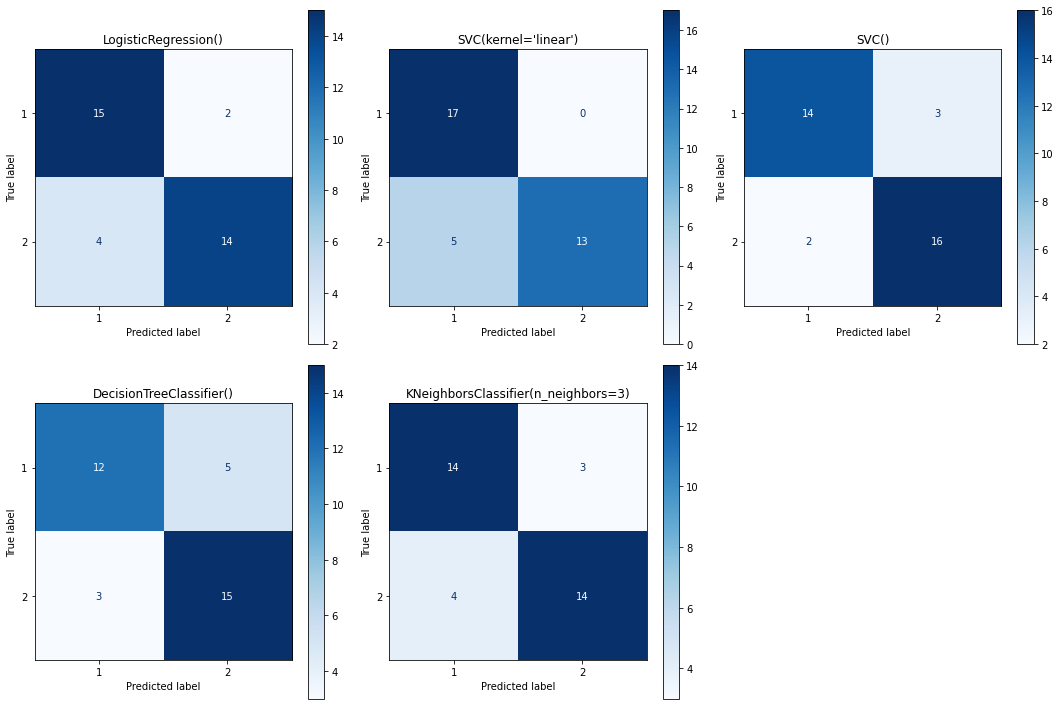

In [13]:
from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot as plt



fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

for model, ax in zip(trained_models, axes.flatten()):
    plot_confusion_matrix(model,
                          x_test,
                          y_test,
                          ax=ax,
                          cmap='Blues',
                         )
    ax.title.set_text(model)
axes[-1][-1].set_visible(False)

plt.tight_layout()
plt.show()